In [1]:
# Step 1: 导入必要的库
import os
import zipfile
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

print("Done!")

Done!


In [2]:
# Step 2: 解压数据集
zip_file_path = 'data.zip'  # 输入 zip 文件名
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./data')  # 解压到 'data' 目录
    
print("Done!")

Done!


In [3]:
# Step 3: 定义数据预处理步骤
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 将图像调整为 128x128
    transforms.ToTensor(),  # 转换为 PyTorch 张量
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 标准化
])

# 加载训练数据
train_dataset = datasets.ImageFolder(root='./data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 加载测试数据
test_dataset = datasets.ImageFolder(root='./data/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Done!")

Done!


In [4]:
# Step 4: 定义简单的卷积神经网络模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # 根据下采样后的图像大小调整
        self.fc2 = nn.Linear(128, 3)  # 3 类对应 3 个人

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = nn.MaxPool2d(2)(x)  # 最大池化层
        x = torch.relu(self.conv2(x))
        x = nn.MaxPool2d(2)(x)
        x = x.view(-1, 32 * 32 * 32)  # 展平张量
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

print("Done!")

Done!


In [5]:
# Step 5: 初始化模型、损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()  # 交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 优化器

# 用于存储损失和准确率的列表
train_losses = []
test_accuracies = []

print("Done!")

Done!


In [6]:
# Step 6: 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    running_loss = 0.0  # 用于记录每轮的损失值
    for images, labels in train_loader:
        optimizer.zero_grad()  # 清零梯度
        outputs = model(images)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)  # 平均损失
    train_losses.append(avg_loss)  # 存储平均损失
    print(f'第 {epoch + 1} 轮, 损失: {avg_loss:.4f}')

    # 每个 epoch 结束后进行测试
    model.eval()  # 设置模型为评估模式
    correct = 0
    total = 0
    with torch.no_grad():  # 禁用梯度计算
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # 获取最大概率的下标
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total  # 计算准确率
    test_accuracies.append(accuracy)  # 存储当前准确率
    print(f'测试集准确率: {accuracy:.2f}%')

print("Done!")

第 1 轮, 损失: 1.0762
测试集准确率: 57.97%
第 2 轮, 损失: 0.6603
测试集准确率: 84.06%
第 3 轮, 损失: 0.3621
测试集准确率: 86.96%
第 4 轮, 损失: 0.2567
测试集准确率: 86.23%
第 5 轮, 损失: 0.1533
测试集准确率: 91.30%
第 6 轮, 损失: 0.1199
测试集准确率: 89.13%
第 7 轮, 损失: 0.0961
测试集准确率: 93.48%
第 8 轮, 损失: 0.0631
测试集准确率: 90.58%
第 9 轮, 损失: 0.0430
测试集准确率: 93.48%
第 10 轮, 损失: 0.0283
测试集准确率: 92.03%
Done!


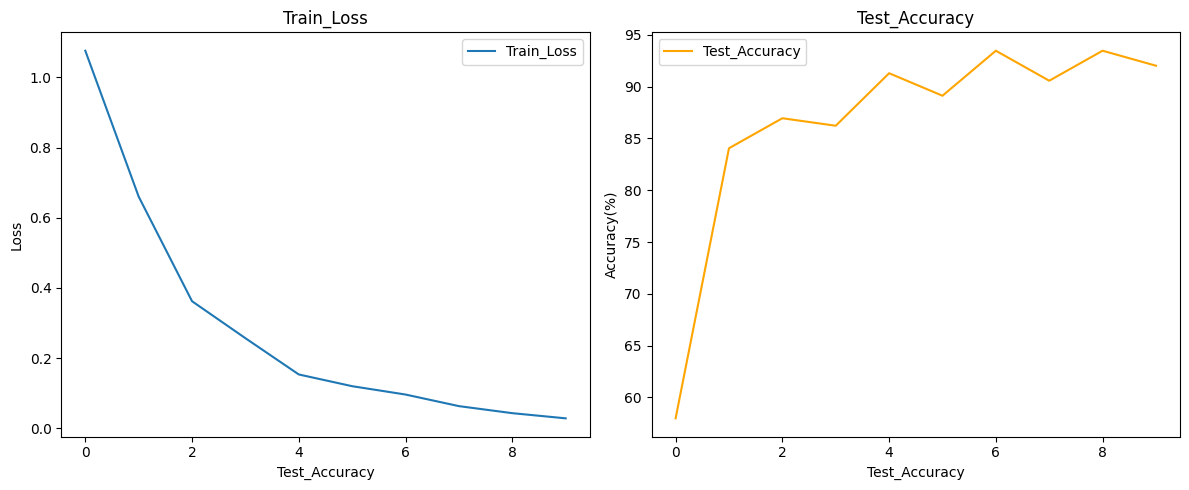

Done!


In [7]:
# Step 7: 可视化训练损失和测试准确率
plt.figure(figsize=(12, 5))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train_Loss')
plt.title("Train_Loss")
plt.xlabel("Test_Accuracy")
plt.ylabel("Loss")
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test_Accuracy', color='orange')
plt.title("Test_Accuracy")
plt.xlabel("Test_Accuracy")
plt.ylabel("Accuracy(%)")
plt.legend()

plt.tight_layout()
plt.show()

print("Done!")

real: Person_2, predict: Person_2


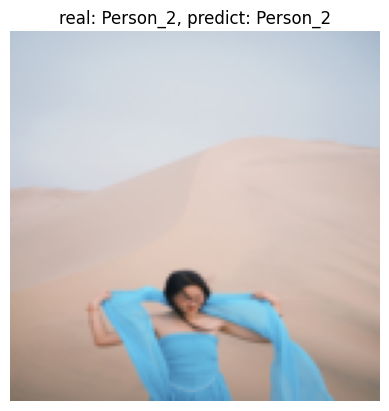

按 Enter 键继续测试下一个样本... 


real: Person_2, predict: Person_2


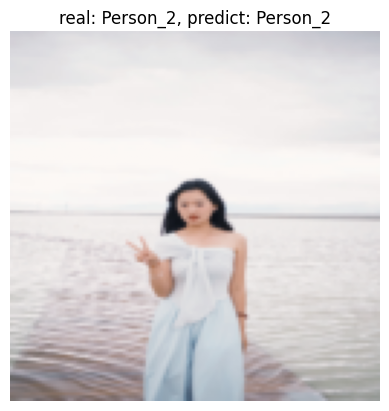

按 Enter 键继续测试下一个样本... 


real: Person_2, predict: Person_2


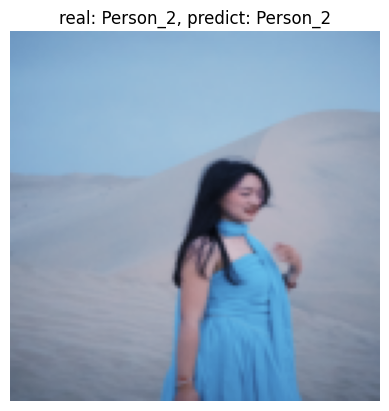

按 Enter 键继续测试下一个样本... 


real: Person_1, predict: Person_1


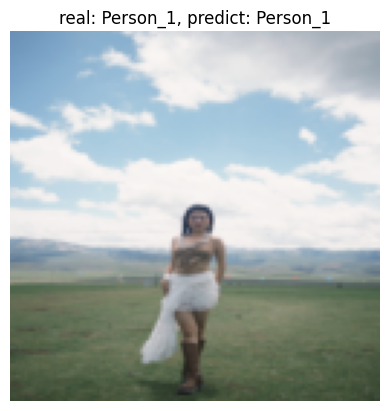

按 Enter 键继续测试下一个样本... 


real: Person_3, predict: Person_3


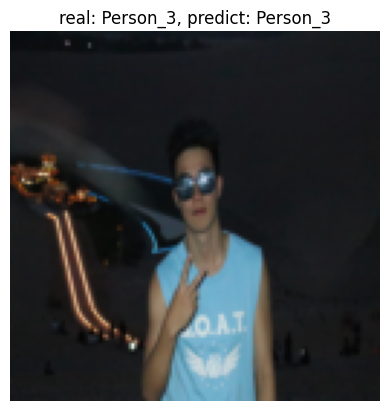

In [ ]:
import random

# Step 8: 测试一个随机图片并显示真实名称和预测名称
def imshow(img):
    """展示图像的辅助函数"""
    img = img / 2 + 0.5  # 反标准化
    plt.imshow(img.numpy().transpose((1, 2, 0)))  # 转换为 HWC 格式
    plt.axis('off')

# 随机选择的索引列表
indices = list(range(len(test_dataset)))
random.shuffle(indices)  # 打乱索引顺序

# 逐个测试，直到测试完所有数据
for index in indices:
    sample_image, sample_label = test_dataset[index]  # 根据随机索引获取样本
    sample_image = sample_image.unsqueeze(0)  # 增加一个维度

    # 进行推断
    model.eval()
    with torch.no_grad():
        output = model(sample_image)
        _, predicted = torch.max(output.data, 1)  # 获取最大的预测概率的下标

    # 获取真实类别和预测类别名称
    true_label = sample_label  # 直接使用 sample_label
    predicted_label = predicted.item()  # 取得预测类别的下标

    # 获取类别名称
    class_names = train_dataset.classes  # 获取类别列表
    true_class_name = class_names[true_label]
    predicted_class_name = class_names[predicted_label]

    # 输出结果
    print(f"real: {true_class_name}, predict: {predicted_class_name}")

    # 显示图像
    plt.figure()
    imshow(sample_image[0])  # 显示第一张图像
    plt.title(f"real: {true_class_name}, predict: {predicted_class_name}")
    plt.show()

    # 这里可以选择在显示完一张图像后暂停，等待用户输入继续测试
    input("按 Enter 键继续测试下一个样本...")


In [1]:
# Test GPU
print("hello world")
import torch
torch.cuda.is_available()

hello world


True

In [3]:
# matplotlib preparation
!pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
     -- ------------------------------------- 0.5/7.8 MB 882.6 kB/s eta 0:00:09
     ---- ----------------------------------- 0.8/7.8 MB 958.5 kB/s eta 0:00:08
     ----- ---------------------------------- 1.0/7.8 MB 1.0 MB/s eta 0:00:07
     ------ --------------------------------- 1.3/7.8 MB 1.0 MB/s eta 0:00:07
     -------- ------------------------------- 1.6/7.8 MB 1.1 MB/s eta 0:00:06
     --------- ------------------------------ 1.8/7.8 MB 1.1 MB/s eta 0:00:06
     ---------- ----------------------------- 2.1/7.8 MB 1.1 MB/s eta 0:00:06
     ---------- ----------------------------- 2.1/7.8 MB 1.1 MB/s eta 0:00:06
     ------------- --------